In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving Toshakhana Files 2.xlsx to Toshakhana Files 2.xlsx


In [4]:
data = pd.read_excel('Toshakhana Files 2.xlsx')

In [6]:
data

,GIFTS RECORD IN TOSHAKHANA SINCE 2002\n2002,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57
0,S.No.,NaN,Detail of Gifts,NaN,NaN,NaN,Name of Recipient,NaN,NaN,NaN,...,NaN,NaN,NaN,Remarks,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,Two small silver Bowls,NaN,NaN,NaN,"Mr. Abdul Sattar, Minister for Foreign Af...",NaN,NaN,NaN,...,NaN,NaN,NaN,Retained,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,One Pilot Pen with ink,NaN,NaN,NaN,"Mr. Abdul Sattar, Minister for Foreign Af...",NaN,NaN,NaN,...,NaN,NaN,NaN,Retained,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,One silver vase,NaN,NaN,NaN,"Mr. Shaukat Aziz, Minister for Finance",NaN,NaN,NaN,...,NaN,NaN,NaN,Retained,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,One (decoration) folding Screen,NaN,NaN,NaN,"Mr. Abdul Sattar, Minister for Foreign Af...",NaN,NaN,NaN,...,NaN,NaN,NaN,Retained,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5089,57,Two Ladies Suit,NaN,NaN,NaN,NaN,NaN,First Lady of Pakistan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5090,58,One Fancy Dupatta One Vase\nOne White Box of C...,NaN,NaN,NaN,NaN,NaN,First Lady of Pakistan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5091,59,Six Gents suit,NaN,NaN,NaN,NaN,NaN,First Lady of Pakistan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5092,DISCLAIMER: -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
new_header = data.iloc[0]
data = data[1:]
data.columns = new_header
data = data.reset_index(drop=True)

In [8]:
data = data[['S.No.', 'Detail of Gifts', 'Name of Recipient', 'Remarks']]
data.columns = ['SNo', 'Gift', 'Recipient', 'Remarks']
data = data.dropna(subset=['Gift', 'Recipient'])

In [9]:
data['Gift'] = data['Gift'].str.strip()
data['Recipient'] = data['Recipient'].str.strip()
data['Remarks'] = data['Remarks'].fillna('Unknown').str.strip()

In [11]:
top_recipients = data['Recipient'].value_counts().head(10)

In [12]:
top_recipients

,count
Recipient,
Name of Recipient,23
"Mr. Abdul Sattar, Minister for Foreign Affairs",19
"General Parvez Musharraf, President\n/ Chief Executive of Pakistan",19
"Mr. Shaukat Aziz, Minister for Finance",18
"General Parvez Musharraf, President/ Chief Executive of Pakistan",10
"Dr. Atta-ur- Rehman, Minister for Science & Technology",9
"General Parvez Musharraf, President/ Chief Executive of\nPakistan",9
"General Parvez Musharraf,\nPresident/ Chief Executive of Pakistan",7
Minister for Petroleum & Natural Resources,7


In [14]:
remarks_counts = data['Remarks'].value_counts()

/tmp/ipython-input-17-2881012898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_recipients.values, y=top_recipients.index, palette='viridis')


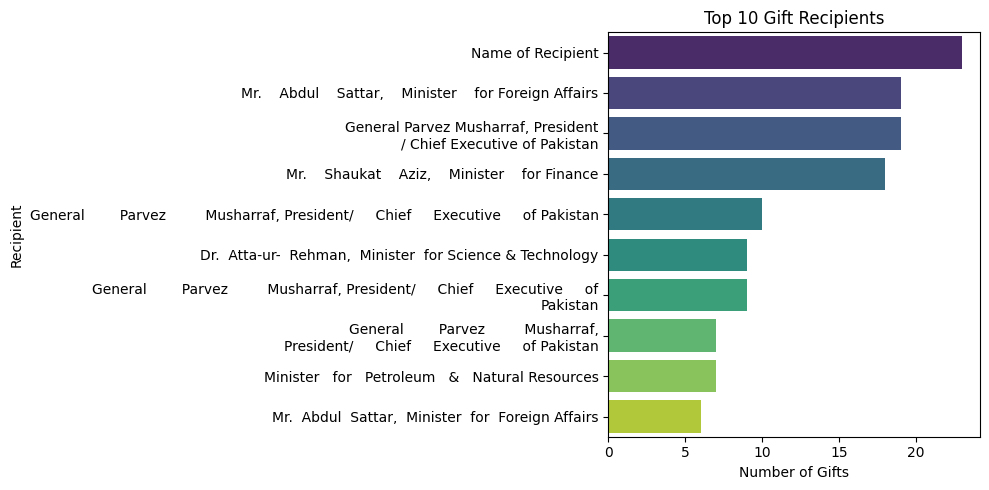

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_recipients.values, y=top_recipients.index, palette='viridis')
plt.title("Top 10 Gift Recipients")
plt.xlabel("Number of Gifts")
plt.ylabel("Recipient")
plt.tight_layout()
plt.show()

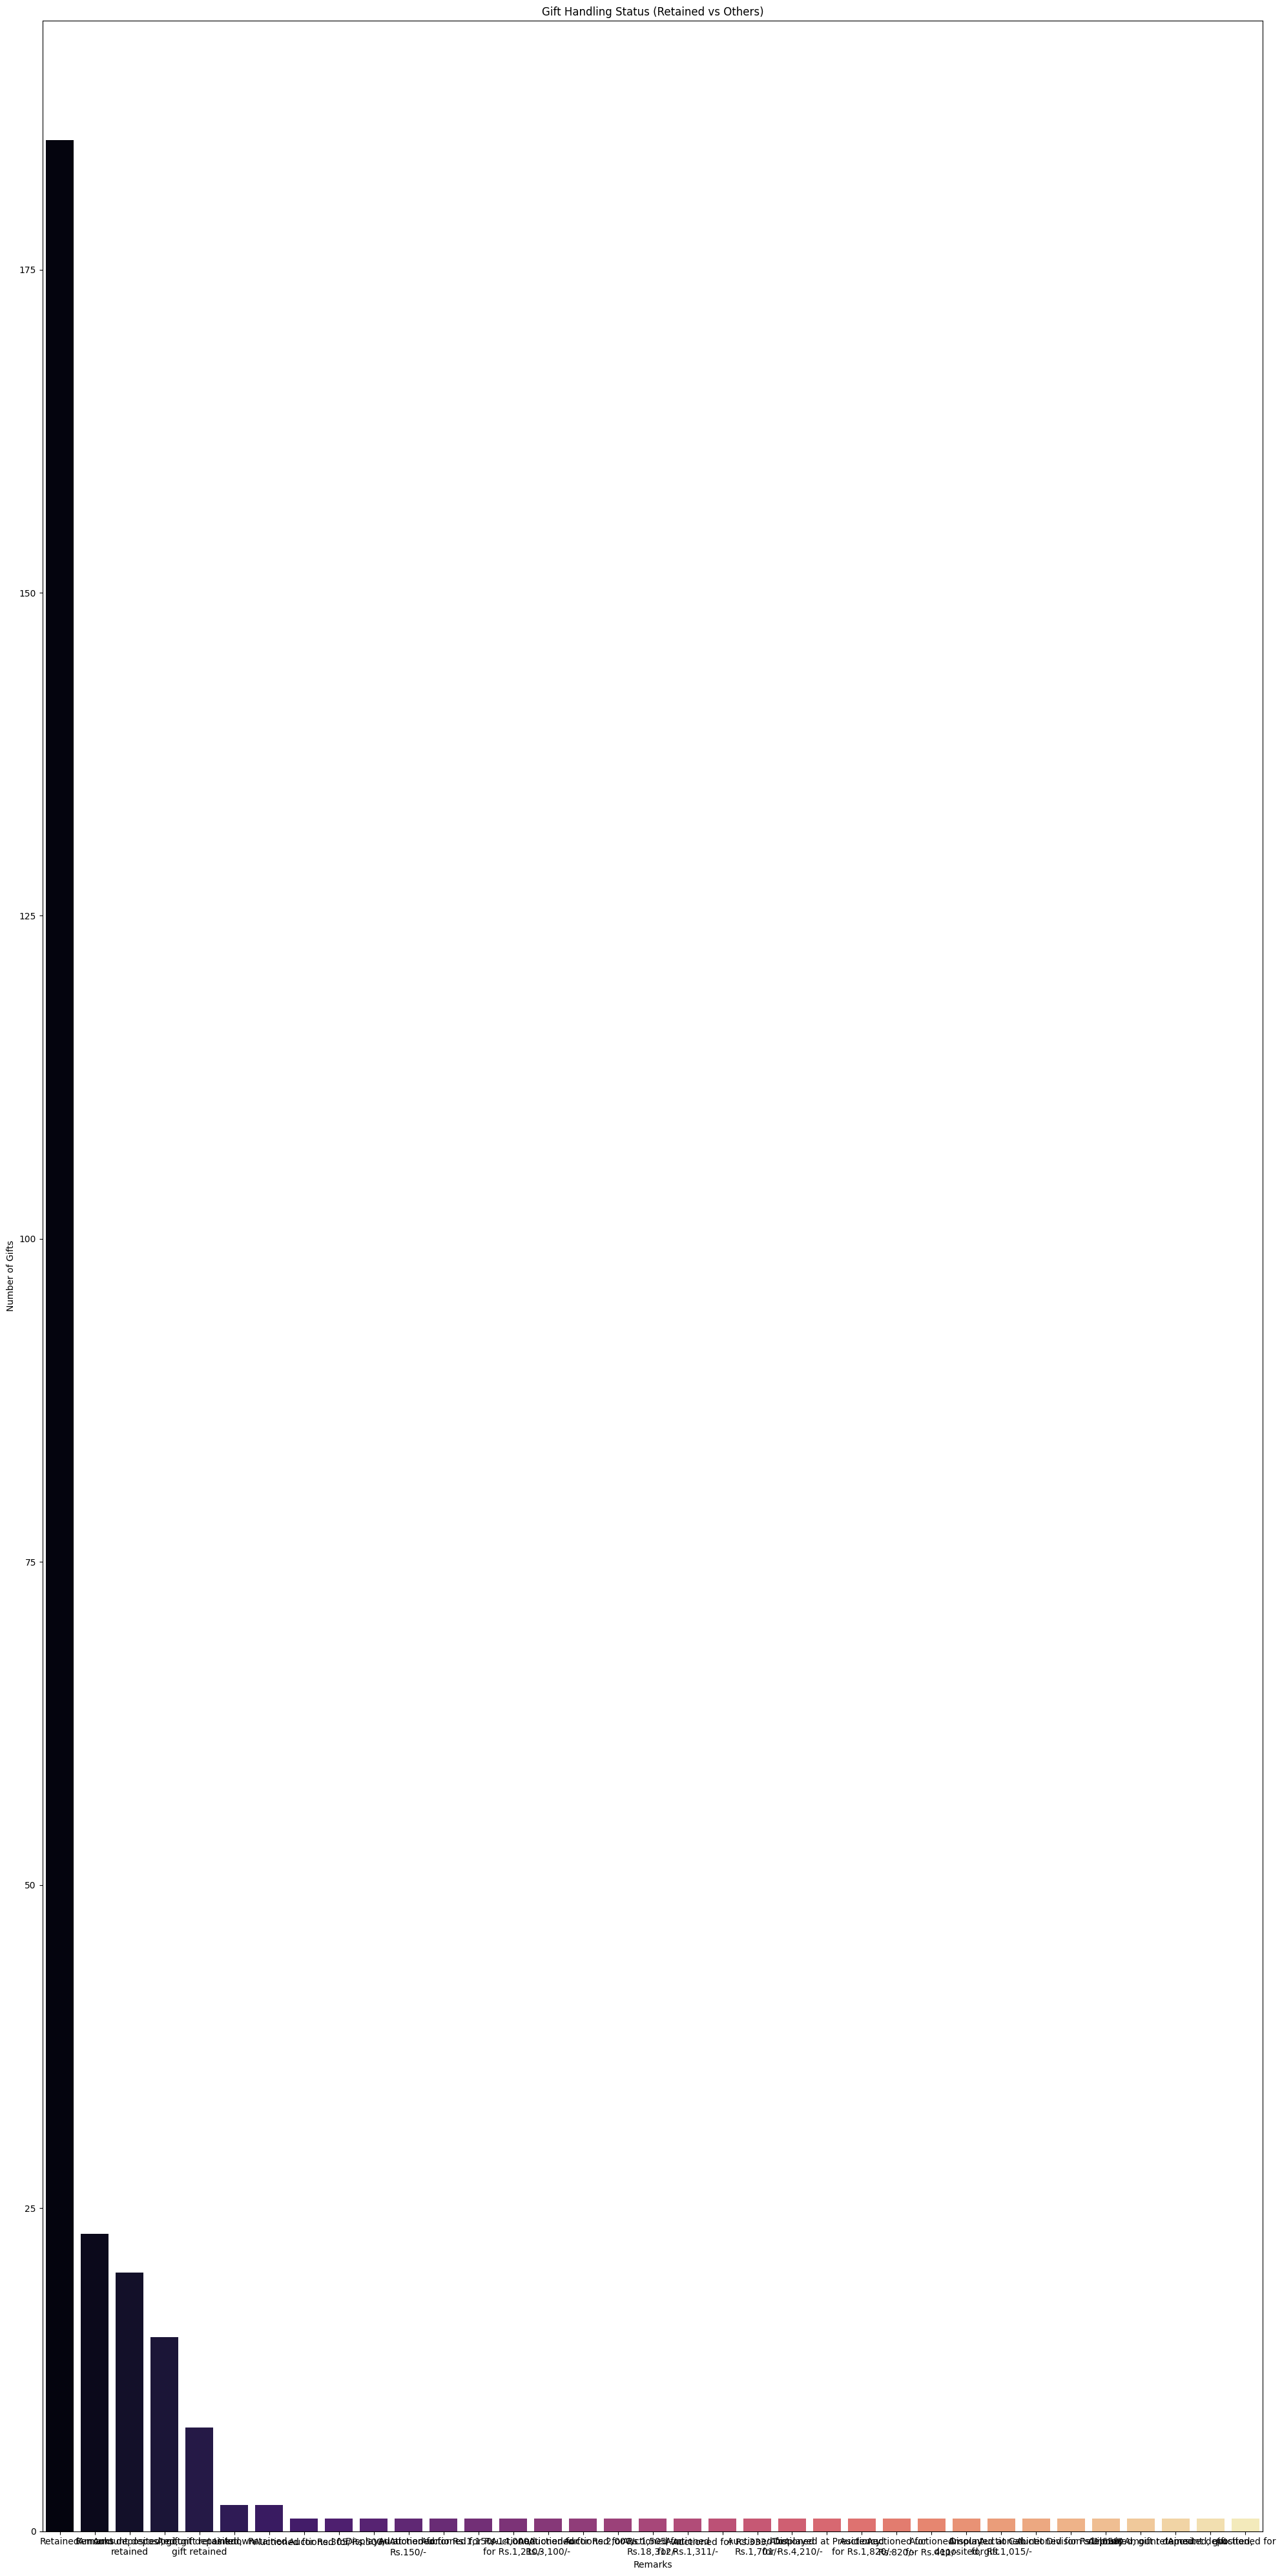

In [19]:
plt.figure(figsize=(20, 40))
sns.barplot(x=remarks_counts.index, y=remarks_counts.values, palette='magma')
plt.title("Gift Handling Status (Retained vs Others)")
plt.ylabel("Number of Gifts")
plt.xlabel("Remarks")
plt.tight_layout()
plt.show()

In [22]:
# If not installed
# !pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode target label
data['Label'] = data['Remarks'].apply(lambda x: 1 if 'Retain' in x else 0)

# Step 2: Combine features (gift + recipient text)
data['Text'] = data['Gift'] + " " + data['Recipient']

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Label'], test_size=0.2, random_state=42)

# Step 4: Create pipeline (TF-IDF + Logistic Regression)
model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=1000)),
    ('clf', LogisticRegression())
])

# Step 5: Train
model.fit(X_train, y_train)

# Step 6: Predict
y_pred = model.predict(X_test)

# Step 7: Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.57      0.72        23
           1       0.77      1.00      0.87        34

    accuracy                           0.82        57
   macro avg       0.89      0.78      0.80        57
weighted avg       0.86      0.82      0.81        57

Confusion Matrix:
 [[13 10]
 [ 0 34]]
